CSC420 A1 Edge Detection

Huiqin Chen


Some of the numpy libraries are used here only to create vectors, perform matrix calculations, etc. OpenCV libraries are only used for comparing results or loading images. **I don't intend to borrow existed libraries for CV questions that asked to be implemented.**

In [ ]:
import numpy as np
# install OpenCV
!pip install opencv-python
import cv2
import matplotlib.pyplot as plt

# Part 1 Gaussian filter

assume input size are odd positie integers
assume the kernel matrix to be a square

In [ ]:
def gaussian_filter(input_size, sigma):
    #since gaussian filters are separable
    vector = np.zeros(input_size, np.float64)
    k = input_size//2

    #set up the 1-D filter with values
    for i in range(k+1):
        temp = np.exp(-(i**2)/(sigma**2))
        vector[k-i] = temp
        vector[k+i] = temp

    filter = (1/(2*np.pi*(sigma**2)))*np.outer(vector, vector)
    #normalizing
    filter = filter/np.sum(filter)
    #print(np.sum(filter))

    return filter


Below is a test on the Gaussian filter funcion, to show the average difference compared to OpenCV funtion is around e^-5

In [ ]:
#test the Gaussian filter
func_try = gaussian_filter(5,5)

# Gaussian blur
kernel = cv2.getGaussianKernel(5, 5) #1-D filter

#get a 2D gaussian kernel from openCV
new = np.outer(kernel,kernel)
new = new/np.sum(new)

avg_diff = np.mean(np.absolute(func_try-new))

print("Average difference minus e^-5:",avg_diff-np.exp(-5))

Average difference minus e^-5: -0.005173548009175291


visualization of the gaussian filter

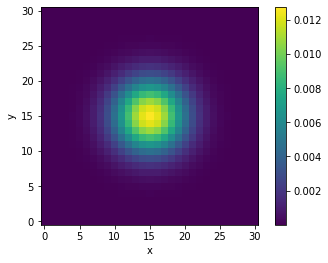

In [ ]:
filter1 = gaussian_filter(31,5)

plt.imshow(filter1, interpolation='none', origin='lower')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

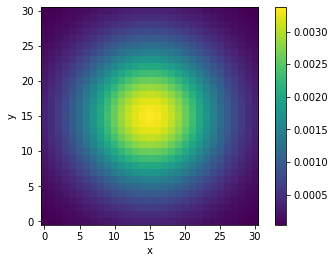

In [ ]:
filter2 = gaussian_filter(31,10)
plt.imshow(filter2, interpolation='none', origin='lower')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

# Part 2 Gradient Magnitude

0 padding is applied
assuming gray scale images

note that final_g is the result required by this question. g_x and g_y are only given for visualizing the calculation on the x and y directions.

In [ ]:
def sobel_gradients(image):
    (x,y) = image.shape
    g_x = np.zeros((x,y),np.float64)
    g_y = np.zeros((x,y),np.float64)
    img = np.zeros((x+2, y+2), np.float64)
    #padding
    img[1:x+1,1:y+1] = image
    #apply sobel operator which is separable

    # g_x [1,2,1], [-1,0,1]
    # convolution step: flipping the filters by 180 degree => [1.0,2.0,1.], [1.0,0.0,-1.0]
    # g_y [-1,0,1],[1,2,1]
    # convolution step: flipping the filters by 180 degree => [1.0,0.0,-1.0],[1.0,2.0,1.0]
    temp_x = np.zeros((x+2, y+2), np.float64)
    temp_y = np.zeros((x+2, y+2), np.float64)
    for i in range(x):
        for j in range(y):
            temp_x[i+1][j+1] = np.dot([1.0,2.0,1.0],img[i:i+3,j+1])
            temp_y[i+1][j+1] = np.dot([-1.0,0.0,1.0],img[i:i+3,j+1])
    for i in range(x):
        for j in range(y):
            g_x[i][j] = np.dot([-1.0,0.0,1.0],temp_x[i+1,j:j+3])
            g_y[i][j] = np.dot([1.0,2.0,1.0],temp_y[i+1,j:j+3])

    # apply final calculation

    final_g = np.sqrt(np.square(g_x)+np.square(g_y))

    return final_g, g_x, g_y

(None, [], [])

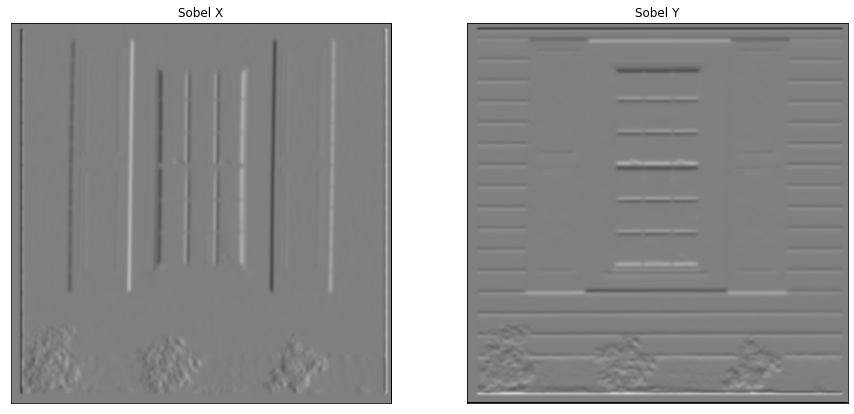

In [ ]:

img = cv2.imread('/content/window.png') # READS IN NUMPY ARRAY
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
laplacian = cv2.Laplacian(grey, cv2.CV_64F)

grey = cv2.GaussianBlur(grey,(5,5),1)

sobel, sobelx, sobely = sobel_gradients(grey)

fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(sobelx,cmap = 'gray')
ax1.title.set_text('Sobel X'), ax1.set_xticks([]), ax1.set_yticks([])
ax2.imshow(sobely,cmap = 'gray')
ax2.title.set_text('Sobel Y'), ax2.set_xticks([]), ax2.set_yticks([])



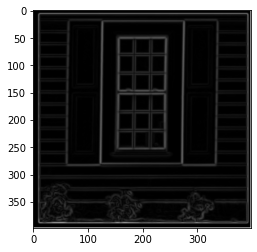

In [ ]:
plt.imshow(sobel, cmap = 'gray')

In [ ]:
#sobelx = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=5)
#sobely = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=5)
sobel_cv = cv2.Sobel(grey, cv2.CV_64F, 1, 1, ksize=3, )
'''
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(sobelc,cmap = 'gray')
ax1.title.set_text('Sobel X'), ax1.set_xticks([]), ax1.set_yticks([])
ax2.imshow(sobely,cmap = 'gray')
ax2.title.set_text('Sobel Y'), ax2.set_xticks([]), ax2.set_yticks([])
'''
#print(np.abs(sobel_cv-sobel)[0:10,0:50])
print(np.sum(np.abs(sobel_cv-sobel)))
print(np.mean(np.abs(sobel_cv-sobel)))


9892132.901155127
62.44875698312623


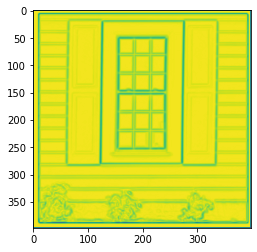

In [ ]:
plt.imshow(sobel_cv-sobel)

In [ ]:
#10638816.607164996

# Part 3 Threshold algorithm

the input variable n is the difference between the old and new threshold in iterations

In [ ]:
def threshold(g_img, n):
    v = np.ravel(g_img)
    t0 = np.mean(v)
    #print("t0: ", t0)
    t1 = None
    diff = float('inf')
    c = 0
    while diff >= n:
        c+=1
        ml= np.mean([i for i in v if i < t0])
        mh = np.mean([i for i in v if i >=t0])
        
        t1 = (ml+mh)/2
        #print("t1:", t1)
        diff = abs(t1-t0)
        #print(t0)
        t0 = t1
        
        

    edge_map = np.where(g_img < t0, 0, 255)
    print("iterations: ",c)
    return edge_map 


The following test on the algorithm show that different n values can decide on waht edges to keep. Larger n means letting more weak edges in the results.

t0:  51.45851761242686
iterations:  22
t0:  51.45851761242686
iterations:  2


(None, [], [])

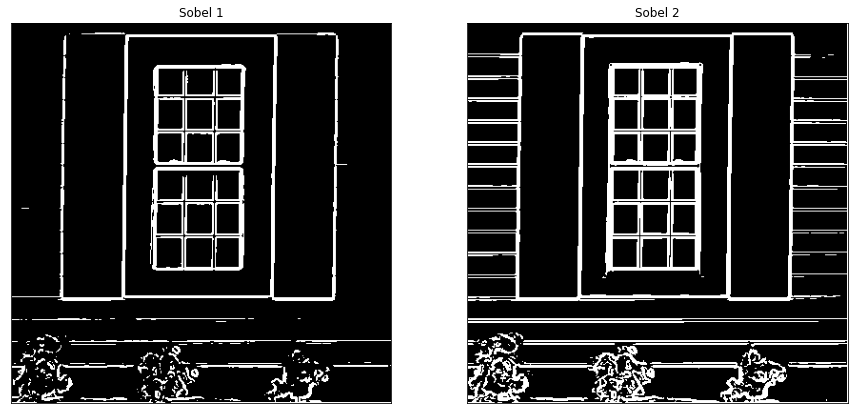

In [ ]:
s1 = threshold(sobel, np.exp(-5))
s2 = threshold(sobel, 20)

fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(s1,cmap = 'gray')
ax1.title.set_text('Sobel 1'), ax1.set_xticks([]), ax1.set_yticks([])
ax2.imshow(s2,cmap = 'gray')
ax2.title.set_text('Sobel 2'), ax2.set_xticks([]), ax2.set_yticks([])

# Part4 Test

(None, [], [])

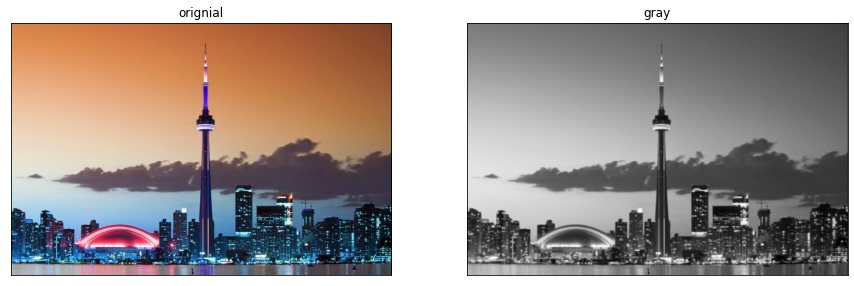

In [ ]:
img1 = cv2.imread('/content/image1.jpg') # READS IN NUMPY ARRAY
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
laplacian = cv2.Laplacian(gray, cv2.CV_64F)

img1_blur = cv2.GaussianBlur(gray,(5,5),1)

#plt.imshow(img1_blur, cmap = 'gray')
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(img1,cmap = 'gray')
ax1.title.set_text('orignial'), ax1.set_xticks([]), ax1.set_yticks([])
ax2.imshow(img1_blur,cmap = 'gray')
ax2.title.set_text('gray'), ax2.set_xticks([]), ax2.set_yticks([])

iterations:  15
iterations:  3


(None, [], [])

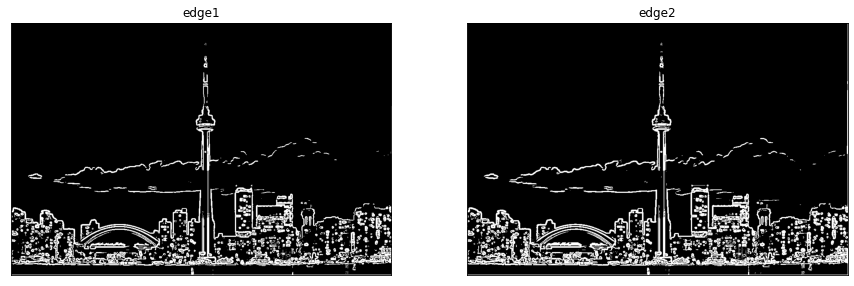

In [ ]:
sobel_img1, sobelx, sobely = sobel_gradients(img1_blur)

edge1 = threshold(sobel_img1, np.exp(-15))
edge2 = threshold(sobel_img1, 20)

#plt.imshow(img1)
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(edge1,cmap = 'gray')
ax1.title.set_text('edge1'), ax1.set_xticks([]), ax1.set_yticks([])
ax2.imshow(edge2,cmap = 'gray')
ax2.title.set_text('edge2'), ax2.set_xticks([]), ax2.set_yticks([])

Visualization of gradients

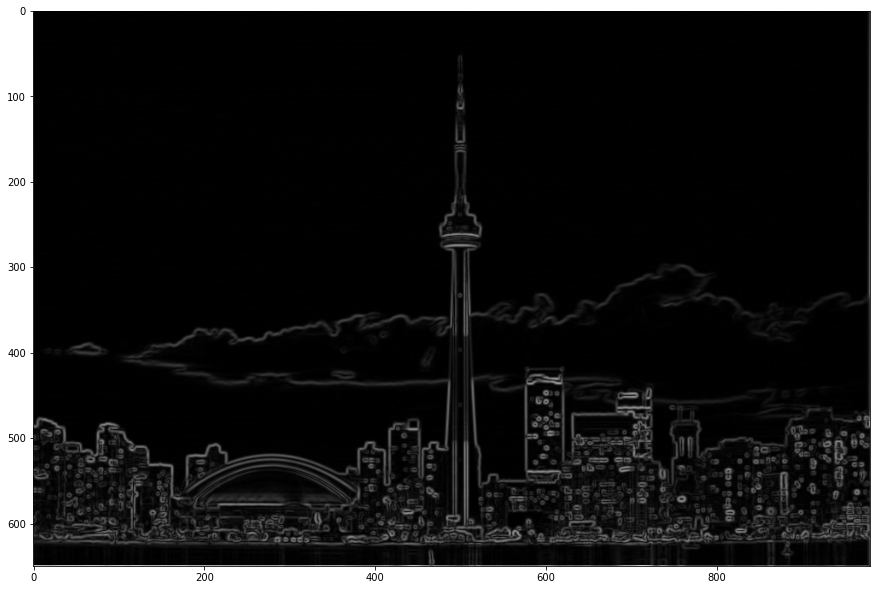

In [ ]:
fig = plt.figure(figsize=(15,15))
plt.imshow(sobel_img1, cmap = "gray")

(None, [], [])

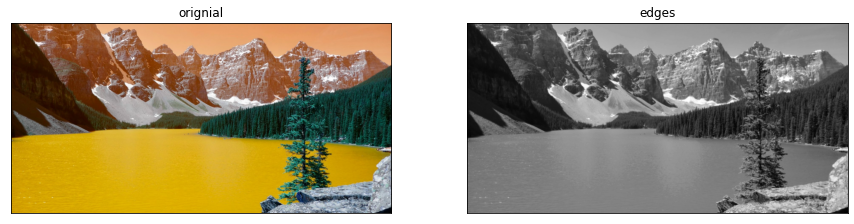

In [ ]:
img2 = cv2.imread('/content/image2.jpg') # READS IN NUMPY ARRAY
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
laplacian = cv2.Laplacian(gray, cv2.CV_64F)

img2_blur = cv2.GaussianBlur(gray,(5,5),1)

#plt.imshow(img1_blur, cmap = 'gray')
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(img2,cmap = 'gray')
ax1.title.set_text('orignial'), ax1.set_xticks([]), ax1.set_yticks([])
ax2.imshow(img2_blur,cmap = 'gray')
ax2.title.set_text('edges'), ax2.set_xticks([]), ax2.set_yticks([])

iterations:  18
iterations:  4


(None, [], [])

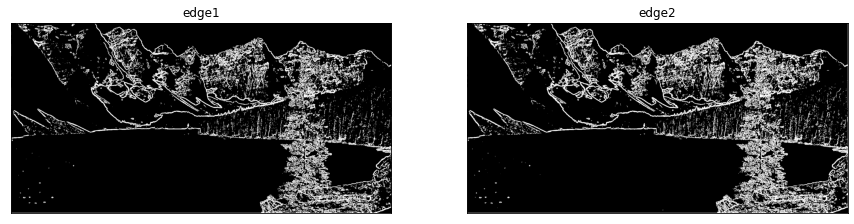

In [ ]:
sobel_img2, sobelx, sobely = sobel_gradients(img2_blur)

img2_edge1 = threshold(sobel_img2, np.exp(-15))
img2_edge2 = threshold(sobel_img2, 5)

#plt.imshow(img1)
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(img2_edge1,cmap = 'gray')
ax1.title.set_text('edge1'), ax1.set_xticks([]), ax1.set_yticks([])
ax2.imshow(img2_edge2,cmap = 'gray')
ax2.title.set_text('edge2'), ax2.set_xticks([]), ax2.set_yticks([])

Notice that when n is small enough, any value smaller than that won't make difference.

iterations:  2


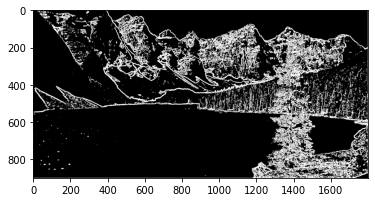

In [ ]:
img2_edge3 = threshold(sobel_img2, 15)
plt.imshow(img2_edge3, cmap = 'gray')

iterations:  18


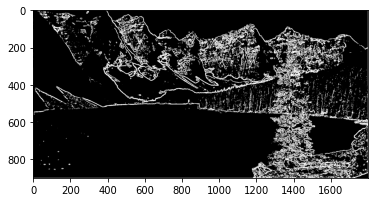

In [ ]:
img2_edge4 = threshold(sobel_img2, np.exp(-30))
plt.imshow(img2_edge4, cmap = 'gray')

In [ ]:
diff = np.sum(np.absolute(img2_edge1-img2_edge3))
print(diff)

21016335


In [ ]:
diff = np.sum(np.absolute(img2_edge1-img2_edge4))
print(diff)

0


Visualization of gradients

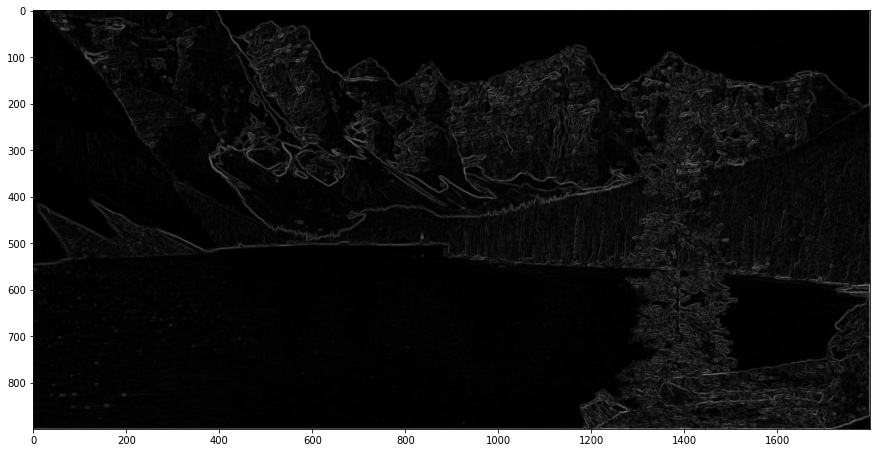

In [ ]:
fig = plt.figure(figsize=(15,15))
plt.imshow(sobel_img2, cmap = "gray")

---------------------------------------------------------------------------------
Test on my own image file


(None, [], [])

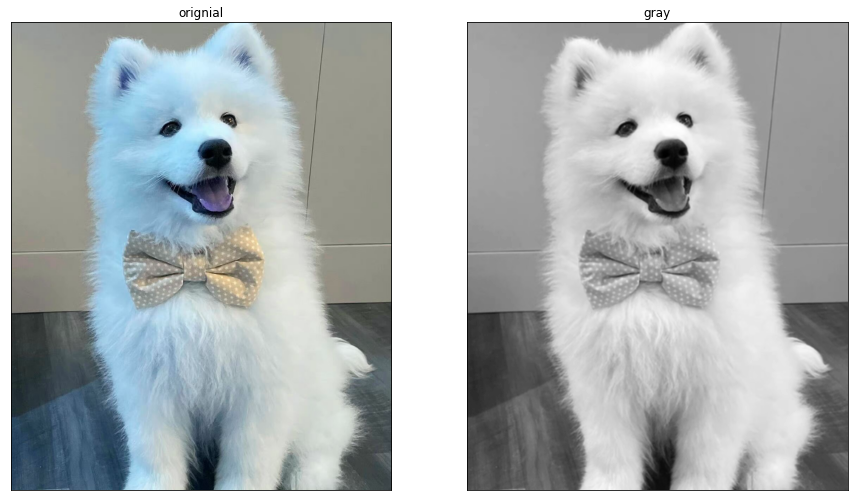

In [ ]:
img3 = cv2.imread('/content/dog.jpg') # READS IN NUMPY ARRAY
gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
laplacian = cv2.Laplacian(gray, cv2.CV_64F)

img3_blur = cv2.GaussianBlur(gray,(5,5),5)

#plt.imshow(img1_blur, cmap = 'gray')
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(img3,cmap = 'gray')
ax1.title.set_text('orignial'), ax1.set_xticks([]), ax1.set_yticks([])
ax2.imshow(img3_blur,cmap = 'gray')
ax2.title.set_text('gray'), ax2.set_xticks([]), ax2.set_yticks([])

iterations:  21
iterations:  14


(None, [], [])

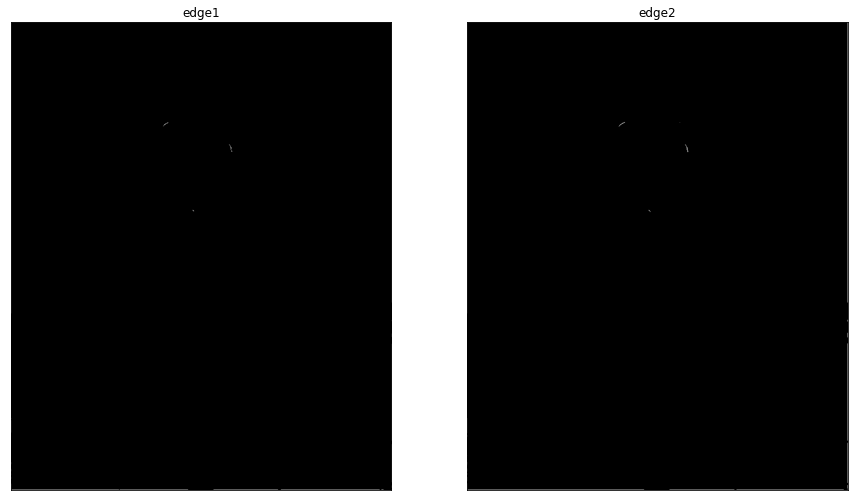

In [ ]:
sobel_img3, sobelx, sobely = sobel_gradients(img3_blur)

img3_edge1 = threshold(sobel_img3, np.exp(-15))
img3_edge2 = threshold(sobel_img3, 5)

#plt.imshow(img1)
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(img3_edge1,cmap = 'gray')
ax1.title.set_text('edge1'), ax1.set_xticks([]), ax1.set_yticks([])
ax2.imshow(img3_edge2,cmap = 'gray')
ax2.title.set_text('edge2'), ax2.set_xticks([]), ax2.set_yticks([])

Let's try a larger n value

iterations:  1


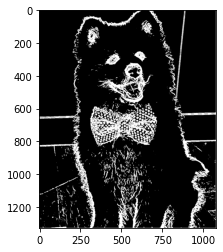

In [ ]:
img3_edge3 = threshold(sobel_img3, 10)
plt.imshow(img3_edge3, cmap = 'gray')

iterations:  13


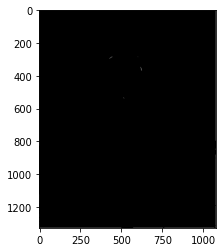

In [ ]:

img3_edge4 = threshold(sobel_img3, 9.7)
plt.imshow(img3_edge4, cmap = 'gray')

Visualization of gradients

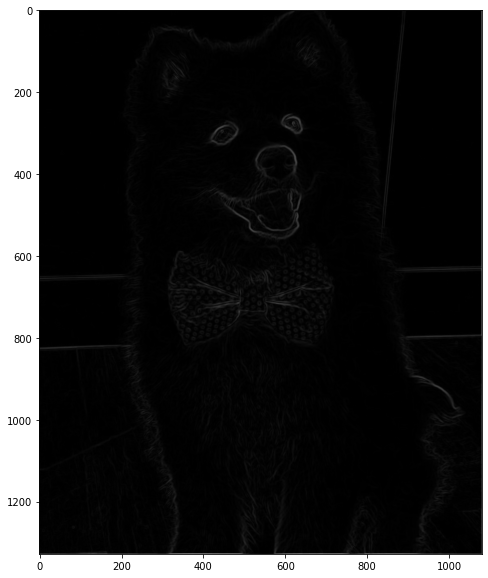

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.imshow(sobel_img3, cmap = "gray")

(None, [], [])

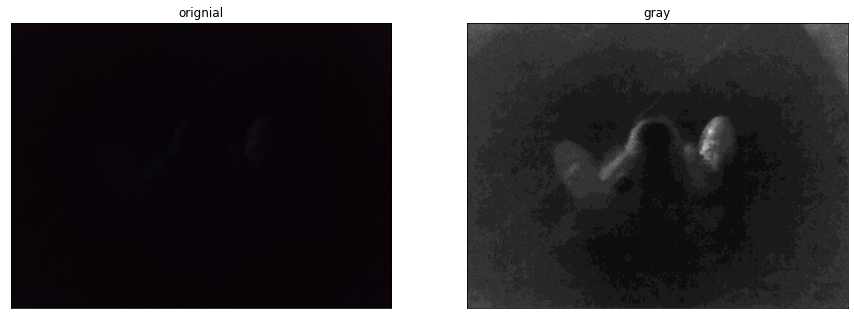

In [ ]:
img3 = cv2.imread('/content/lianzhen.jpg') # READS IN NUMPY ARRAY
gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
laplacian = cv2.Laplacian(gray, cv2.CV_64F)

img3_blur = cv2.GaussianBlur(gray,(5,5),5)

#plt.imshow(img1_blur, cmap = 'gray')
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(img3,cmap = 'gray')
ax1.title.set_text('orignial'), ax1.set_xticks([]), ax1.set_yticks([])
ax2.imshow(img3_blur,cmap = 'gray')
ax2.title.set_text('gray'), ax2.set_xticks([]), ax2.set_yticks([])

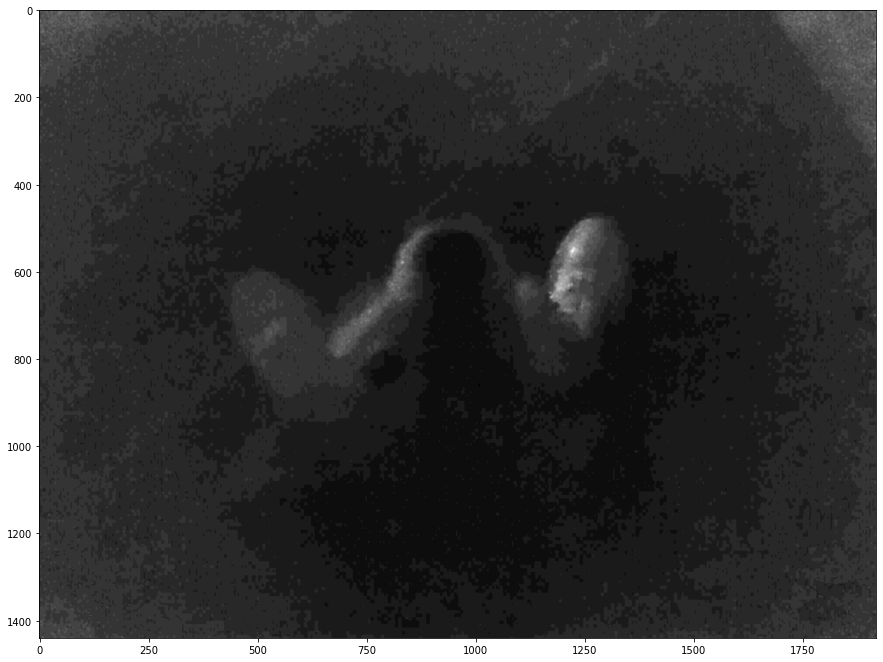

In [ ]:
fig = plt.figure(figsize=(15,15))
plt.imshow(img3_blur, cmap = "gray")

iterations:  1


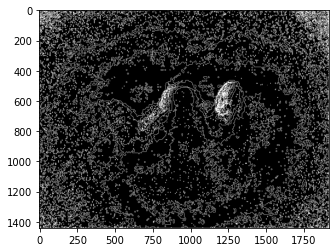

In [ ]:
sobel_img3, sobelx, sobely = sobel_gradients(img3_blur)
img3_edge3 = threshold(sobel_img3, 10)
plt.imshow(img3_edge3, cmap = 'gray')

iterations:  4


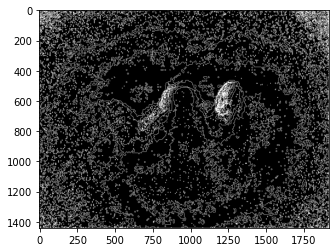

In [ ]:
img3_edge1 = threshold(sobel_img3, 0.000002)
plt.imshow(img3_edge3, cmap = 'gray')

# Report and discussion

This threshold algorithm find the edges according to the general disrtribution of the gradients.

A simple demonstration as follows.

If there are more data in smaller gradients, more iteratons leads to larger threshold. This means that the edges needs to be larger to be detected.
(remove the comment of the print methods in threshold(image, n) to see details of each iteration)


In [ ]:
a  = np.array([1,2,3,6,8])

b = threshold(a,0.1)

print(b)

iterations:  2
[  0   0   0 255 255]


If there are more data in larger gradients, more iterations leads to smaller threshold.

In [ ]:
a  = np.array([1,2,6,8,10])

b = threshold(a,0.1)

print(b)

iterations:  2
[  0   0 255 255 255]


This algorithm means that when there are many large gradients in the image, we don't need to set a high standard for detecting edges, as there are many sharp changes that are obvious to be seen as edges. If there are more small gradients in the image, this means that the change in the gradient is not obvious enought, and we need to use higher threshold to find those edges that standing out.

Generally it worked for all images tested here, provided that a approriate value of deciding when to stop the iterations has been found.

The advantage of this algorithm is that it cares about the distribution of the image gradients, and allows for choosing how many edges to be detected. 

The disadvanage of this algorithm is that sometimes it is hard to decide when to end the iteration. In previous dog example, we see that it requires a lot control on choosing the right n value. To use this algorithm well, we probably need another algorithm to help with this.